In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [4]:
HouseData=pd.read_csv("/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv")
HouseData.head(15)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [5]:
HouseData1=HouseData.drop(["area_type","society","balcony","availability"],axis="columns")
HouseData1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
HouseData1.isnull().sum()
HouseData2=HouseData1.dropna()
HouseData2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
HouseData2["bhk"]=HouseData2["size"].apply(lambda x:int(x.split(" ")[0]))
HouseData2.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [8]:
HouseData2[HouseData2.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [9]:
HouseData2["total_sqft"].unique()

def convert_sqft_to_num(x):
  tokens=x.split("-")
  if len(tokens)==2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None 


HouseData3=HouseData2.copy()
HouseData3["total_sqft"]=HouseData3["total_sqft"].apply(convert_sqft_to_num)
HouseData3.head(20)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [10]:
HouseData4=HouseData3.copy()
HouseData4["price_per_sqft"]=HouseData4["price"]*100000/HouseData4["total_sqft"]
HouseData4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [11]:
location_stats=HouseData4.groupby("location")["location"].agg("count").sort_values(ascending=False)
len(location_stats[location_stats<=10])
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

HouseData4.location=HouseData4.location.apply(lambda x:"other" if x in location_stats_less_than_10 else x)
len(HouseData4.location.unique())

HouseData4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [12]:
#outliers
HouseData4[HouseData4.total_sqft/HouseData4.bhk<300].head()

#REMOVING OUTLIERS
HouseData5=HouseData4[~(HouseData4.total_sqft/HouseData4.bhk<300)]
HouseData5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [13]:
def remove_pps_outliers(HouseData):
  HouseData_out=pd.DataFrame()
  for key,subHouseData in HouseData.groupby("location"):
    m=np.mean(subHouseData.price_per_sqft)
    st=np.std(subHouseData.price_per_sqft)
    reduced_HouseData=subHouseData[(subHouseData.price_per_sqft>(m-st))&(subHouseData.price_per_sqft<=(m+st))]
    HouseData_out=pd.concat([HouseData_out,reduced_HouseData],ignore_index=True)
  return HouseData_out

HouseData6=remove_pps_outliers(HouseData5)
HouseData6.shape

(10244, 7)

In [14]:
def plot_scatter_chart(HouseData,location):
  bhk2=HouseData[(HouseData.location==location)&(HouseData.bhk==2)]
  bhk3=HouseData[(HouseData.location==location)&(HouseData.bhk==3)]

  plt.scatter(bhk2.total_sqft,bhk2.price,color="blue",label="2 BHK",s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,marker="+",color="green",label="3 BHK",s=50)
  plt.xlabel("TOTAL_SQFT_AREA")
  plt.ylabel("PRICE")
  plt.title("LOCATION")

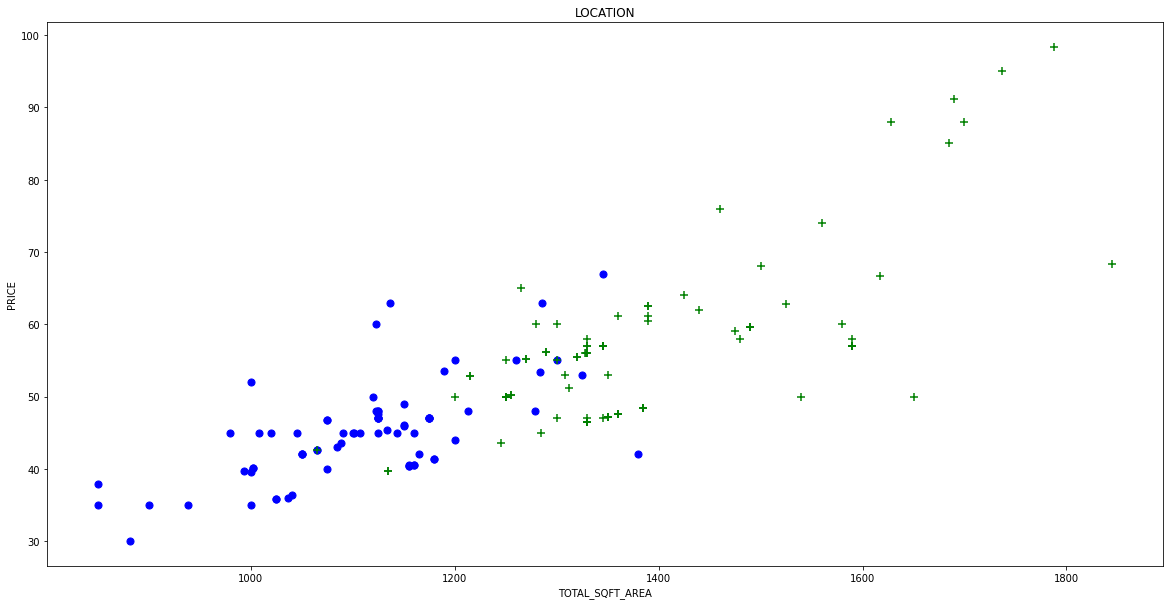

In [15]:
plot_scatter_chart(HouseData6,"Uttarahalli")

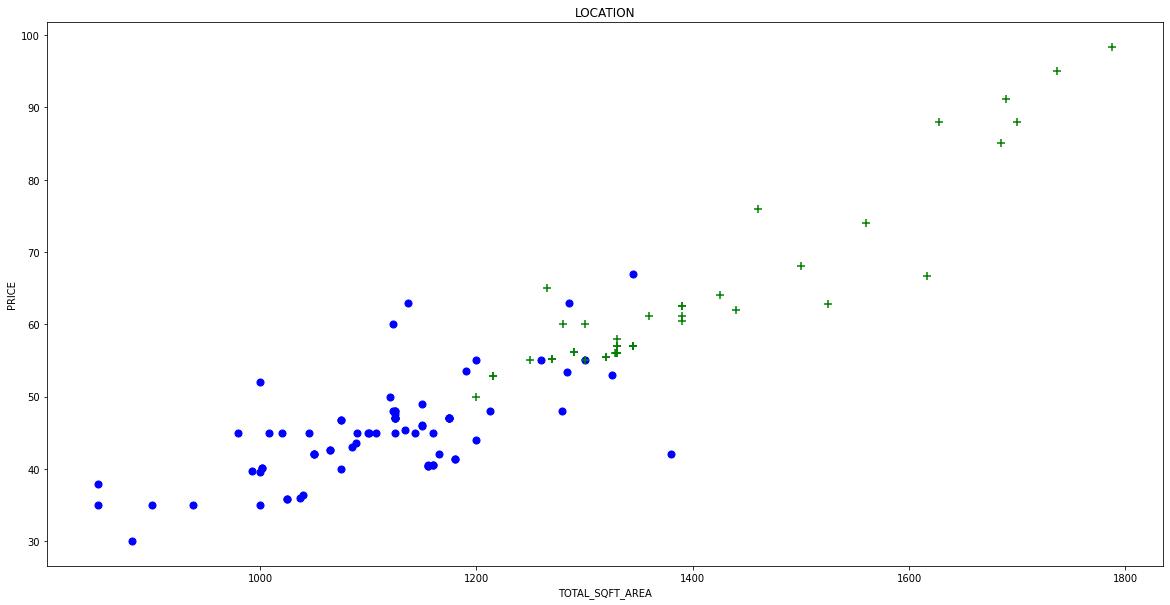

In [16]:
def remove_bhk_outliers(HouseData):
  exclude_indices=np.array([])
  for location,location_HouseData in HouseData.groupby("location"):
    bhk_stats={}
    for bhk,bhk_HouseData in location_HouseData.groupby("bhk"):
      bhk_stats[bhk]={
          "mean":np.mean(bhk_HouseData.price_per_sqft),
          "std":np.std(bhk_HouseData.price_per_sqft),
          "count":bhk_HouseData.shape[0]
      }
    for bhk,bhk_HouseData in location_HouseData.groupby("bhk"):
      stats=bhk_stats.get(bhk-1)
      if stats and stats["count"]>5:
        exclude_indices=np.append(exclude_indices,bhk_HouseData[bhk_HouseData.price_per_sqft<(stats["mean"])].index.values)
  return HouseData.drop(exclude_indices,axis="index")

HouseData7=remove_bhk_outliers(HouseData6)
plot_scatter_chart(HouseData7,"Uttarahalli")

In [17]:
HouseData8=HouseData7.drop(["size","price_per_sqft"],axis="columns")
HouseData8.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


In [18]:
dummies=pd.get_dummies(HouseData8.location)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
HouseData9=pd.concat([HouseData8,dummies.drop("other",axis="columns")],axis="columns")
HouseData9.head()
HouseData10=HouseData9.drop("location",axis="columns")
HouseData10.head(20)
HouseData10.shape

(7342, 245)

In [20]:
x=HouseData10.drop("price",axis="columns")
x.head()

y=HouseData10.price
y.head()

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8058812738705268

In [22]:
def predict_price(location,sqft,bath,bhk):
  loc_index=np.where(x.columns==location)[0][0]
  z=np.zeros(len(x.columns))
  z[0]=sqft
  z[1]=bath
  z[2]=bhk
  if loc_index>=0:
    z[loc_index]=1
  return lr_clf.predict([z])[0]
predict_price("Old Airport Road",2732,4,4)

202.61793600752827